In [72]:
library(readxl)
library(repr)
options(repr.plot.width = 14, repr.plot.height = 10)
dataset <- read_excel("USDTRY_Historical_Data.xlsx", skip = 3,
                   col_types = c("date","numeric"), col_names = c("Dates","Lastprice"))
head(dataset)
tail(dataset)
summary(dataset)
str(dataset)

Dates,Lastprice
1997-10-20,0.1808
1997-10-21,0.1813
1997-10-22,0.1820
1997-10-23,0.1818
1997-10-24,0.1826
1997-10-27,0.1828


Dates,Lastprice
2018-11-13,5.4774
2018-11-14,5.4604
2018-11-15,5.3514
2018-11-16,5.3330
2018-11-19,5.3125
2018-11-20,5.3871


     Dates                       Lastprice     
 Min.   :1997-10-20 00:00:00   Min.   :0.1808  
 1st Qu.:2003-02-07 00:00:00   1st Qu.:1.3212  
 Median :2008-05-14 00:00:00   Median :1.5123  
 Mean   :2008-05-12 22:52:28   Mean   :1.7428  
 3rd Qu.:2013-08-15 00:00:00   3rd Qu.:1.9491  
 Max.   :2018-11-20 00:00:00   Max.   :6.8838  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	5289 obs. of  2 variables:
 $ Dates    : POSIXct, format: "1997-10-20" "1997-10-21" ...
 $ Lastprice: num  0.181 0.181 0.182 0.182 0.183 ...


In [3]:
weekly <- split(dataset$Lastprice, format(as.Date(dataset$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%V"))
weeklylog <- sapply(weekly, function(x){log(x[length(x)]/x[1])})

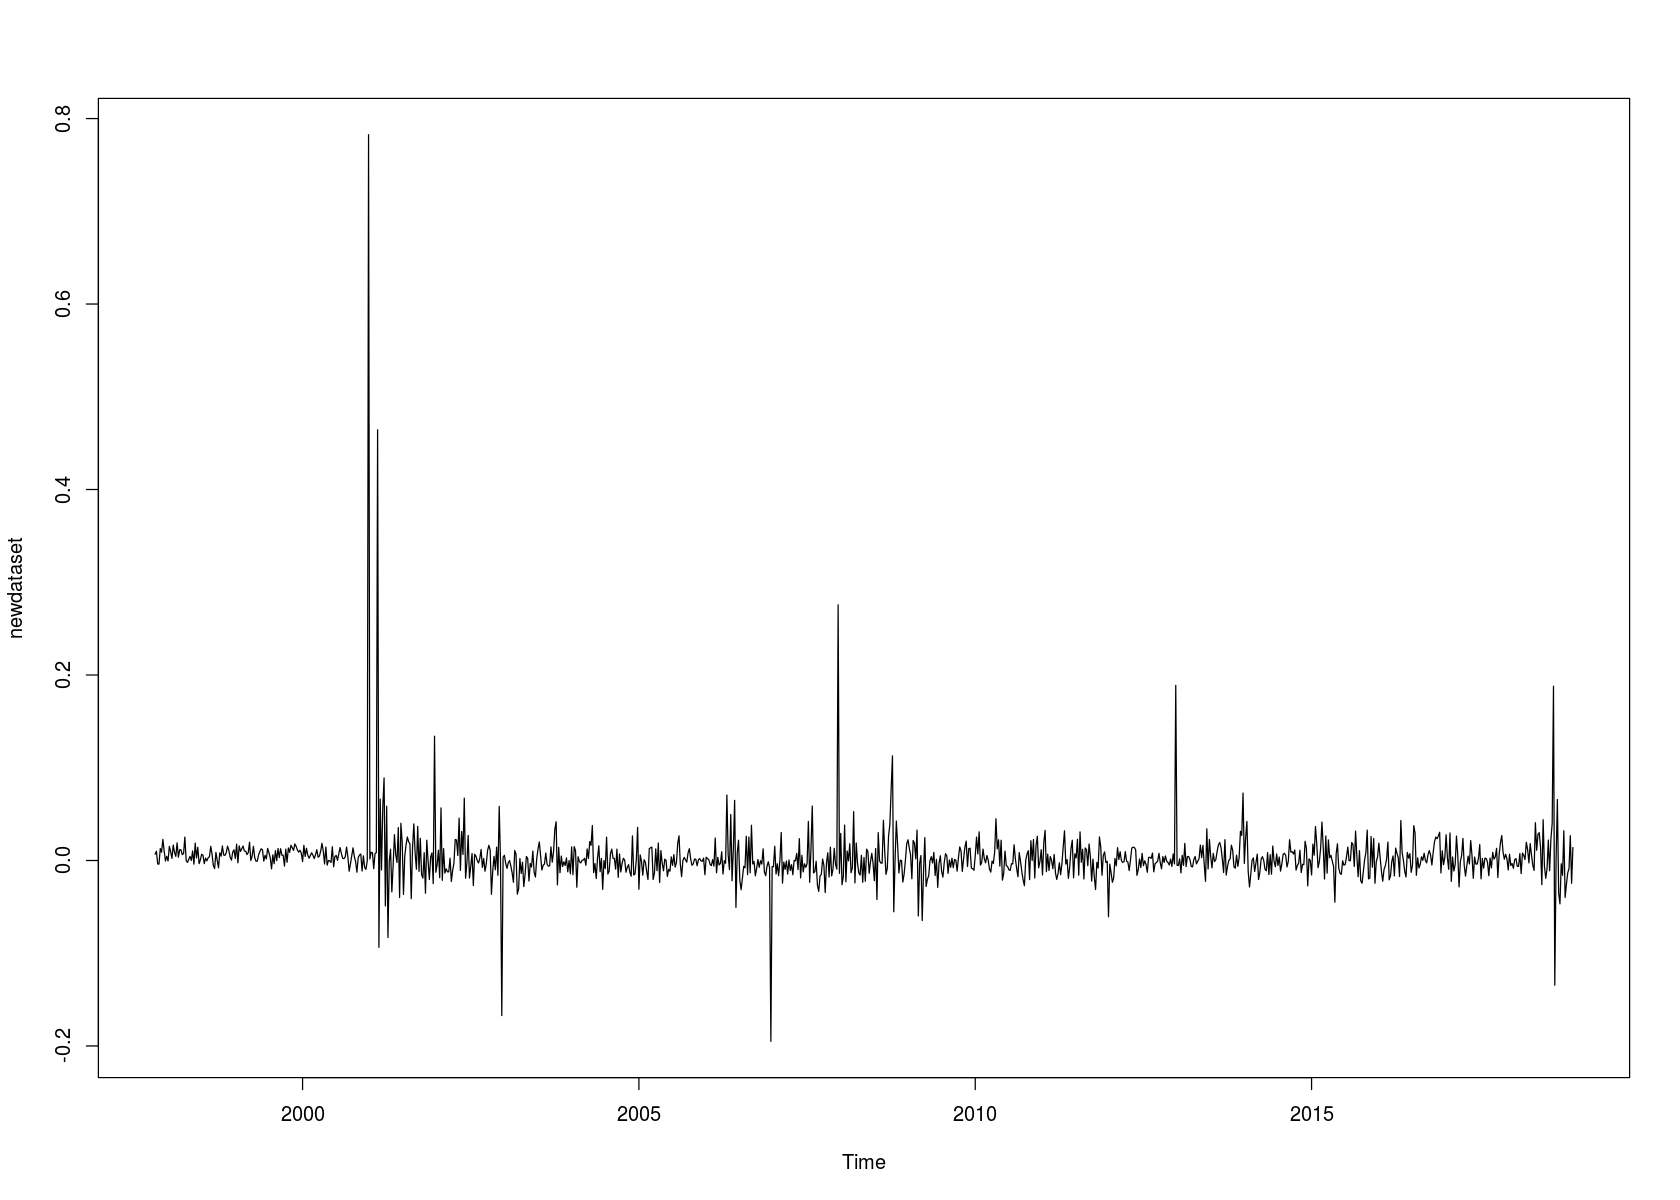

In [9]:
newdataset <- ts(weeklylog, frequency = 52, start = c(1997,43), names = names(logreturn))
plot(newdataset)

In [8]:
library(tseries)
adf.test( newdataset , alternative = c("stationary", "explosive"), k=0 )

Warning message in adf.test(newdataset, alternative = c("stationary", "explosive"), :
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  newdataset
Dickey-Fuller = -35.605, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [10]:
library(forecast)
auto.arima( newdataset )

Series: newdataset 
ARIMA(3,0,3)(0,0,1)[52] with zero mean 

Coefficients:
          ar1     ar2     ar3     ma1      ma2      ma3     sma1
      -0.7246  0.8562  0.8216  0.6844  -0.8516  -0.7214  -0.0710
s.e.   0.0562  0.0328  0.0544  0.0682   0.0462   0.0669   0.0308

sigma^2 estimated as 0.001234:  log likelihood=2120.15
AIC=-4224.3   AICc=-4224.16   BIC=-4184.29

Verileri 1997-2001  , 2001-2012 , 2012-2016 üç döneme ayıracağız 

In [17]:
data9701 <- dataset[dataset$Dates >= "1997-10-20" & dataset$Dates <= "2000-12-31",]
data0112 <- dataset[dataset$Dates >= "2001-01-01" & dataset$Dates <= "2011-12-31",]
data1216 <- dataset[dataset$Dates >= "2012-01-01" & dataset$Dates <= "2016-12-31",]

bu dönemlerin herbiri için haftalık verisetine ayırdıktan sonra 
her haftanın logreturn lerini hesaplayacağız

In [21]:
weekly9701 <- split(data9701$Lastprice, format(as.Date(data9701$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%W"))
weeklylog9701 <- sapply(weekly9701, function(x){log(x[length(x)]/x[1])})
weekly0112 <- split(data0112$Lastprice, format(as.Date(data0112$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%W"))
weeklylog0112 <- sapply(weekly0112, function(x){log(x[length(x)]/x[1])})
weekly1216 <- split(data1216$Lastprice, format(as.Date(data1216$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%W"))
weeklylog1216<- sapply(weekly1216, function(x){log(x[length(x)]/x[1])})

bu haftalık logreturn verilerinden aylık veriler oluşturup. Bu aylık verilerin varyanslarından oluşan yeni bir veriseti oluşturacağız

In [312]:
weekly9701 <- split(data9701$Lastprice, format(as.Date(data9701$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%m-%W"))
weeklylog9701 <- sapply(weekly9701, function(x){log(x[length(x)]/x[1])})
library(tibble)
xc <- enframe(weeklylog9701, name = "Dates", value = "weeklylog")
head(xc)
split(xc$weeklylog , xc$Dates)
# SIKINTI xc$Dates leri Date formatında okutamadık. char formatında. Dolayısıyla aylık verilerden oluşan yeni
# veri setini de oluşturamadım. 

Dates,weeklylog
1997-10-42,0.009906520
1997-10-43,-0.003836672
1997-11-44,-0.003813679
1997-11-45,0.012882626
1997-11-46,0.008959217
1997-11-47,0.022751757


$`1997-10-42`
[1] 0.00990652

$`1997-10-43`
[1] -0.003836672

$`1997-11-44`
[1] -0.003813679

$`1997-11-45`
[1] 0.01288263

$`1997-11-46`
[1] 0.008959217

$`1997-11-47`
[1] 0.02275176

$`1997-12-48`
[1] 0.01015237

$`1997-12-49`
[1] -0.0005031447

$`1997-12-50`
[1] 0.00448543

$`1997-12-51`
[1] -0.0004927322

$`1997-12-52`
[1] 0.006819315

$`1998-01-01`
[1] 0.01523839

$`1998-01-02`
[1] 0.009407407

$`1998-01-03`
[1] 0.002338089

$`1998-01-04`
[1] 0.01662088

$`1998-02-05`
[1] 0.008595393

$`1998-02-06`
[1] 0.004476283

$`1998-02-07`
[1] 0.01902291

$`1998-02-08`
[1] 0.00349498

$`1998-03-09`
[1] 0.01164559

$`1998-03-10`
[1] 0.01146266

$`1998-03-11`
[1] 0.006319802

$`1998-03-12`
[1] 0.007487556

$`1998-03-13`
[1] 0.002475249

$`1998-04-13`
[1] 0.01952075

$`1998-04-14`
[1] 0

$`1998-04-15`
[1] -0.002031282

$`1998-04-16`
[1] 0.001210898

$`1998-04-17`
[1] 0.006018072

$`1998-05-17`
[1] 0

$`1998-05-18`
[1] 0

$`1998-05-19`
[1] 0.01028897

$`1998-05-20`
[1] -0.003937013

$`1998-05-21`
[1] 0.01875788

$`1998-06-22`
[1] 0.002716866

$`1998-06-23`
[1] 0.01421188

$`1998-06-24`
[1] -0.003418807

$`1998-06-25`
[1] 0.0007575758

$`1998-06-26`
[1] 0.0007510327

$`1998-07-26`
[1] 0.003738322

$`1998-07-27`
[1] 0.005589729

$`1998-07-28`
[1] -0.003347595

$`1998-07-29`
[1] 0.002600782

$`1998-07-30`
[1] -0.0003698909

$`1998-08-31`
[1] 0.002940098

$`1998-08-32`
[1] 0.00402415

$`1998-08-33`
[1] 0.01520667

$`1998-08-34`
[1] 0.007168489

$`1998-08-35`
[1] 0

$`1998-09-35`
[1] -0.0003622532

$`1998-09-36`
[1] -0.00873368

$`1998-09-37`
[1] 0.00873368

$`1998-09-38`
[1] 0.0003622532

$`1998-09-39`
[1] -0.001439367

$`1998-10-39`
[1] -0.0007246377

$`1998-10-40`
[1] 0.008301798

$`1998-10-41`
[1] 0.004662013

$`1998-10-42`
[1] 0.01562532

$`1998-10-43`
[1] 0.005959702

$`1998-11-44`
[1] 0.005545941

$`1998-11-45`
[1] 0.00851069

$`1998-11-46`
[1] 0.01546769

$`1998-11-47`
[1] 0.0109074

$`1998-11-48`
[1] 0

$`1998-12-48`
[1] 0.004938282

$`1998-12-49`
[1] 0.0003279226

$`1998-12-50`
[1] 0.009141428

$`1998-12-51`
[1] 0.01151276

$`1998-12-52`
[1] 0.002221165

$`1999-01-01`
[1] 0.01759945

$`1999-01-02`
[1] -0.002485245

$`1999-01-04`
[1] 0.01570555

$`1999-02-05`
[1] 0.009793816

$`1999-02-06`
[1] 0.01259721

$`1999-02-07`
[1] 0.01558023

$`1999-02-08`
[1] 0.01021285

$`1999-03-09`
[1] 0.01005034

$`1999-03-10`
[1] 0.006375628

$`1999-03-11`
[1] 0.008513027

$`1999-03-12`
[1] 0.01973304

$`1999-04-13`
[1] 0

$`1999-04-14`
[1] 0.004774545

$`1999-04-15`
[1] 0.01523939

$`1999-04-16`
[1] 0.003115267

$`1999-04-17`
[1] -0.0007728971

$`1999-05-18`
[1] -0.0007642339

$`1999-05-19`
[1] 0.006088299

$`1999-05-20`
[1] 0.009770841

$`1999-05-21`
[1] 0.01260988

$`1999-05-22`
[1] 0

$`1999-06-22`
[1] 0.008789119

$`1999-06-23`
[1] -0.000728067

$`1999-06-24`
[1] 0.005553558

$`1999-06-25`
[1] 0.001673241

$`1999-06-26`
[1] 0.004750603

$`1999-07-26`
[1] 0.00376737

$`1999-07-27`
[1] 0.008427016

$`1999-07-28`
[1] 0.003012399

$`1999-07-29`
[1] -0.009037253

$`1999-07-30`
[1] 0.006069113

$`1999-08-31`
[1] -0.003465407

$`1999-08-32`
[1] 0.01056267

$`1999-08-33`
[1] -0.0002283366

$`1999-08-34`
[1] 0.01282502

$`1999-08-35`
[1] 0

$`1999-09-35`
[1] 0.003357586

$`1999-09-36`
[1] 0.01263455

$`1999-09-37`
[1] 0.005674393

$`1999-09-38`
[1] 0.005630158

$`1999-09-39`
[1] -0.006696213

$`1999-10-39`
[1] 0

$`1999-10-40`
[1] 0.01223848

$`1999-10-41`
[1] -0.001922872

$`1999-10-42`
[1] 0.01354231

$`1999-10-43`
[1] 0.008773819

$`1999-11-44`
[1] 0.01638374

$`1999-11-45`
[1] 0.01371266

$`1999-11-46`
[1] 0.01093342

$`1999-11-47`
[1] 0.01783137

$`1999-11-48`
[1] 0.0009651579

$`1999-12-48`
[1] 0.01513874

$`1999-12-49`
[1] 0.01129307

$`1999-12-50`
[1] 0.00904813

$`1999-12-51`
[1] 0.01097175

$`1999-12-52`
[1] 0.007931426

$`2000-01-01`
[1] -0.001118568

$`2000-01-02`
[1] 0.01633513

$`2000-01-03`
[1] 0.00437877

$`2000-01-04`
[1] 0.01314979

$`2000-01-05`
[1] 0

$`2000-02-05`
[1] 0.0005343308

$`2000-02-06`
[1] 0.002484033

$`2000-02-07`
[1] 0.00

In [318]:
class(xc$Dates)
str(xc$Dates)
#as.Date(xc$Dates,"%Y-%m-%W")
#format(as.Date(dataset$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%V")
#format(as.Date(xc$Dates,tryFormat=c("%Y-%m-%W")),"%Y-%m-%V")
#install.packages("anytime")
#library(anytime)
#anytime(xc$Dates,ymw)
#as.Date(xc$Dates, format=" ")

[1] "character"

 chr [1:183] "1997-10-42" "1997-10-43" "1997-11-44" "1997-11-45" ...
